<a href="https://colab.research.google.com/github/TARUN2K3/Costumer_churn_Predection/blob/main/Tensorflow_Day_9_Costumer_churn_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting customer churn using Artificial Neural Networks (ANNs)**

### **Importing essential Libraries**

In [ ]:
import numpy as np  # Importing NumPy library and aliasing it as np
import pandas as pd  # Importing pandas library and aliasing it as pd
from matplotlib import pyplot as plt  # Importing pyplot module from matplotlib and aliasing it as plt
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler class from sklearn.preprocessing

In [ ]:
import pandas as pd  # Importing pandas library and aliasing it as pd

# Read data from a CSV file into a DataFrame
# Assumes that the CSV file is located at "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the DataFrame
df  # Displays the contents of the DataFrame


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Data Preprocessing**

In [ ]:
# Remove the 'customerID' column from the DataFrame
# 'customerID' is dropped along columns (axis=1) using the drop() method
# inplace=True ensures that the operation is performed directly on the original DataFrame 'df'
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# Display information about the DataFrame
# The info() method provides a concise summary of the DataFrame, including:
# - The number of entries (rows)
# - The number of columns
# - The data types of each column
# - The memory usage of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## **Clean the data**

In [ ]:
# Replace empty strings in the 'TotalCharges' column with 0
# This operation replaces any occurrences of empty strings (' ') in the 'TotalCharges' column with 0
df['TotalCharges'] = df['TotalCharges'].replace({' ': 0})


In [ ]:
# Convert the 'TotalCharges' column to float data type
# This operation converts the data type of the 'TotalCharges' column from its current data type to float
# This is typically done to ensure numerical consistency and enable mathematical operations on the column
df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## **Encode categorical variables**

In [ ]:
# Get unique values in the 'MultipleLines' column
# The unique() method returns an array containing unique values present in the 'MultipleLines' column
df['MultipleLines'].unique()


array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})

In [ ]:
df['gender']=df['gender'].replace({'Female':1,'Male':0})

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,1,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Convert binary categorical variables ('Yes'/'No') to numerical format (1/0)
# Replace 'Yes' with 1 and 'No' with 0 in the current column
# This transformation makes binary categorical variables compatible with machine learning algorithms
binary_encoding=['Partner','Dependents','PhoneService','OnlineSecurity','MultipleLines','OnlineBackup','DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']
for col in binary_encoding:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.50,No
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Get data types of columns 'tenure', 'MonthlyCharges', and 'TotalCharges'
# This operation applies the dtype attribute to each column to retrieve its data type

unique_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(lambda x: x.dtype)


## **Scale the features**

In [ ]:
normalized_col=['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
for col in normalized_col:
  # Extract the column values and reshape to 2D array
    col_values = df[col].values.reshape(-1, 1)
    # Apply MinMax scaling to the column
    df[col] = scaler.fit_transform(col_values)

In [ ]:
pd.DataFrame(col_values)

,0
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.013889,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,0.115423,0.003437,No
1,0,0,0,0,0.472222,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,0.385075,0.217564,No
2,0,0,0,0,0.027778,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,0.354229,0.012453,Yes
3,0,0,0,0,0.625000,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),0.239303,0.211951,No
4,1,0,0,0,0.027778,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,0.521891,0.017462,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,0.662189,0.229194,No
7039,1,0,1,1,1.000000,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),0.845274,0.847792,No
7040,1,0,1,1,0.152778,0,0,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,0.112935,0.039892,No
7041,0,1,1,0,0.055556,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,0.558706,0.035303,Yes


In [ ]:
df.shape #Print Rows and Columns

(7043, 20)

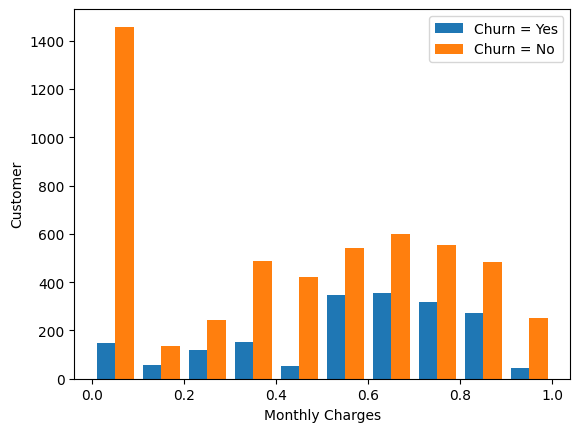

In [ ]:
# Extract MonthlyCharges for customers with churn='Yes' and churn='No'
x = df[df.Churn=='Yes'].MonthlyCharges
y = df[df.Churn=='No'].MonthlyCharges

# Plot histogram for MonthlyCharges distribution
# Two histograms are plotted for churn='Yes' and churn='No' categories
plt.hist([x, y], label=['Churn = Yes', 'Churn = No'])

# Add legend, xlabel, and ylabel
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("Customer")

# Show the plot
plt.show()


In [ ]:
column=['gender','SeniorCitizen','Partner','Dependents'	,'tenure',	'PhoneService',	'MultipleLines',	'InternetService'	,'OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod'	,'MonthlyCharges',	'TotalCharges'	,'Churn']
for col in column:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 'No internet service']
OnlineBackup: [1 0 'No internet service']
DeviceProtection: [0 1 'No internet service']
TechSupport: [0 1 'No internet service']
StreamingTV: [0 1 'No internet service']
StreamingMovies: [0 1 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
column=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in column:
  df[col]=df[col].replace({'No internet service':0})

In [ ]:
column=['gender','SeniorCitizen','Partner','Dependents'	,'tenure',	'PhoneService',	'MultipleLines',	'InternetService'	,'OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod'	,'MonthlyCharges',	'TotalCharges'	,'Churn']
for col in column:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.013889,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,0.115423,0.003437,No
1,0,0,0,0,0.472222,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,0.385075,0.217564,No
2,0,0,0,0,0.027778,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,0.354229,0.012453,Yes
3,0,0,0,0,0.625000,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),0.239303,0.211951,No
4,1,0,0,0,0.027778,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,0.521891,0.017462,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,0.662189,0.229194,No
7039,1,0,1,1,1.000000,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),0.845274,0.847792,No
7040,1,0,1,1,0.152778,0,0,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,0.112935,0.039892,No
7041,0,1,1,0,0.055556,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,0.558706,0.035303,Yes


In [ ]:
column=['gender','SeniorCitizen','Partner','Dependents'	,'tenure',	'PhoneService',	'MultipleLines',	'InternetService'	,'OnlineSecurity'	,'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod'	,'MonthlyCharges',	'TotalCharges'	,'Churn']
for col in column:
        print(f"{col}: {df[col].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup:

In [ ]:
 # Perform one-hot encoding using pandas get_dummies function
df = pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.152778,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.055556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
# Get a list of column names from the DataFrame
column_names = df.columns.tolist()


In [ ]:
columns=['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

for col in columns:
  if df[col].dtype=='object':
    print(f'{col}: {df[col].unique()}')

PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'PaperlessBilling' column
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

# Replace 'Yes' with 1 and 'No' with 0 in the 'Churn' column
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [ ]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.152778,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.055556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
df['PaperlessBilling']

0       1
1       0
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling, Length: 7043, dtype: int64

# **Split Data**

In [ ]:
# Separate features (X) and target variable (y)
# Remove the 'Churn' column from the DataFrame to get the feature matrix (X)
x = df.drop('Churn', axis='columns')

# Get the 'Churn' column as the target variable (y)
y = df['Churn']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# x_train and x_test contain the features, y_train and y_test contain the target variable
# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

In [ ]:
import numpy as np

# Convert input arrays to float32
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)


# **Build the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26,)),  # Input layer with 26 features
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
177/177 [==============================] - 1s 2ms/step - loss: 0.5987 - accuracy: 0.6713
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7469
Epoch 3/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7579
Epoch 4/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7636
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7725
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7758
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7812
Epoch 8/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7835
Epoch 9/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7851
Epoch 10/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7863

In [ ]:
y_test[:5]

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

In [ ]:
y_predict = model.predict(x_test)
y_predict[:5]

45/45 [==============================] - 0s 1ms/step


array([[0.5838442 ],
       [0.28379503],
       [0.03805858],
       [0.6105663 ],
       [0.07433899]], dtype=float32)

In [ ]:
y_predict = model.predict(x_test)

# Threshold the predicted probabilities to binary predictions
y_binary_predict = []
for element in y_predict:
    if element < 0.5:
        y_binary_predict.append(0)
    else:
        y_binary_predict.append(1)

# Display the first five binary predictions
print(y_binary_predict[:5])


45/45 [==============================] - 0s 1ms/step
[1, 0, 0, 1, 0]


# **Evaluate the Model**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_binary_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



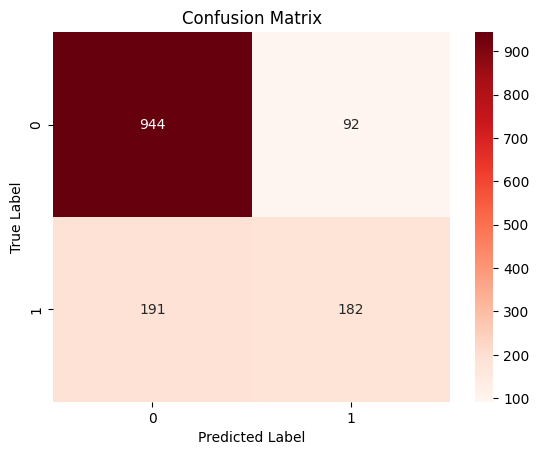

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already obtained y_predict and thresholded it into binary predictions
# y_predict = model.predict(x_test)
# y_binary_predict = [1 if pred > 0.5 else 0 for pred in y_predict]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_binary_predict)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show plot
plt.show()



To interpret the confusion matrix and extract the values of true positives, false positives, false negatives, and true negatives:

1.  True Positive (TP): The number of samples that were correctly predicted as positive by the model.
2.  False Positive (FP): The number of samples that were incorrectly predicted as positive by the model (i.e., the model predicted positive when the actual value was negative).
3.  False Negative (FN): The number of samples that were incorrectly predicted as negative by the model (i.e., the model predicted negative when the actual value was positive).
4.  True Negative (TN): The number of samples that were correctly predicted as negative by the model.



*   The top-left cell (948) represents the number of samples that were correctly predicted as positive (True Positives).
*   The top-right cell (88) represents the number of samples that were incorrectly predicted as positive (False Positives).
*   The bottom-left cell (203) represents the number of samples that were incorrectly predicted as negative (False Negatives).
*   The bottom-right cell (170) represents the number of samples that were correctly predicted as negative (True Negatives).








